# Predictive Modeling of Customer Bookings

---

We will use various packages for data manipulation, feature engineering and machine learning to conduct predictive modeling.

### Exploratory Data Analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import numpy as np
import math
import pandas as pd

# Auxiliary classes:
from python_scripts.data_transformation import DataProcessing
from python_scripts.data_visualisation import DataVisualisation

In [2]:
# Setting random seed to ensure reproducibility every time this notebook is run:
np.random.seed(123)

# Instantiating each imported class:
processing = DataProcessing()
visual = DataVisualisation()

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


Now that we have imported and visually inspected the data, we can use the `.info()` method to give us a data description, telling us the names of the columns, their data types and how many null values we have. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
df = processing.map_weekdays(df, "flight_day")

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the numeric columns for the entire dataset. This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

Now we can try to consider some other metrics that may be useful in the data set. A continent column can be derived from the `booking_origin` column, this could help the model identify booking patterns by a larger region.

In [9]:
processing.country_to_continent_column(df, 'booking_origin')
df

c:\Users\joels\Miniconda3\envs\British_Airways_Project\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\joels\Miniconda3\envs\British_Airways_Project\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_continent
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,Oceania
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,Oceania
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,Asia
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,Oceania
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,Oceania
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,Oceania
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,Oceania
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,Oceania


We can also visualise the distribution of the continuous numerical data.

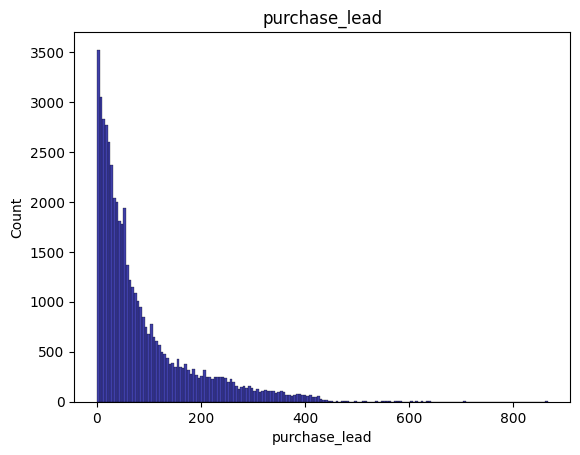

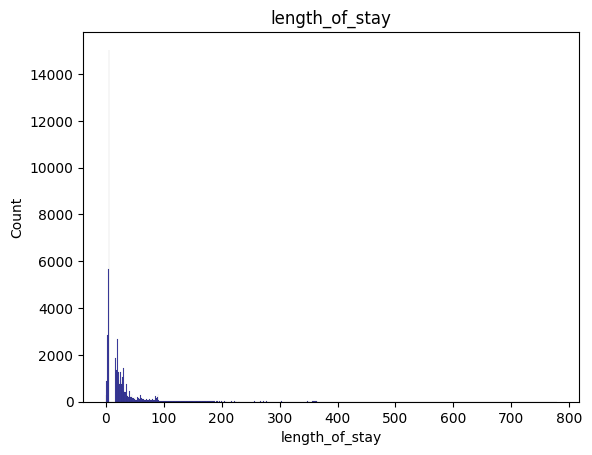

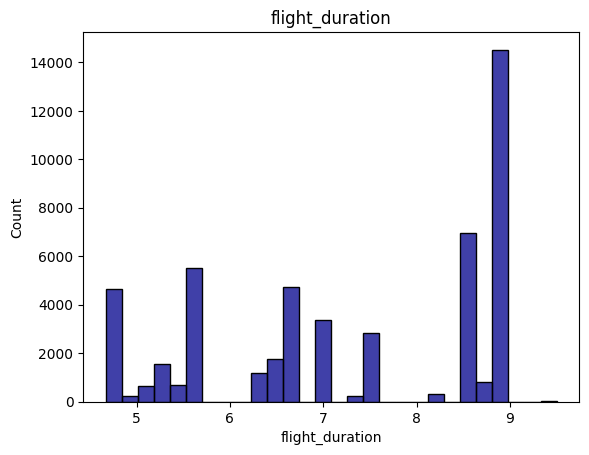

In [10]:
for column in ['purchase_lead', 'length_of_stay', 'flight_duration']:
    visual.histogram(df, column)

Here it can be seen that neither of the features follow a normal distribution and have outliers. However, since a `Random Forest Classifier` is used for predictive modeling, no normalisation is needed since this model is based on partitioning the data at nodes based on the feature.

### Predictive Modeling

we can see the continents have been succesfully added. Now we can start preparing the dataframe for predictive modeling. A `Random Forest Classifier` will be used due to its ability to predict data classification whilst minimising variance in results and the ability to identify feature importance in model predictions. This model will be trained to predict which bookings are likely to be completed based on other booking features.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

First we need to handle object type columns that contain strings. Machine learning algorithms cannot process these data types, so these columns should be encoded into category codes in integer format.

In [12]:
processed_df = df.copy() # Creating a copy of the dataframe which will be pre-processed for the predictive model.

# Encode string columns to numeric type to be compatible with model.
processed_df = processing.encode_object_columns(processed_df)
processed_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_continent
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0,5
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0,5
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0,2
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0,5
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,720,4,1,0,1,5.62,0,5
49996,1,0,2,111,6,4,7,720,4,0,0,0,5.62,0,5
49997,1,0,2,24,6,22,6,720,4,0,0,1,5.62,0,5
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0,5


When running this model, one problem encountered was a bias towards the output being 0 even when the true value was actually 1, it was identified that one potential cause of this could be the imbalanced dataset which contained 85 % '0' values and 15 % '1' values. To fix this, to train the data a subset of the dataframe was used in which the classes (0 and 1) were balanced and equally represented. This increased the accuracy score and cross validation scores and decreased variability.

In [13]:
model_df = processed_df.copy() # Creating a copy of the processed dataframe which will be used for the predictive model.
# Select 7,400 rows with 0 in the target column:
df_0 = model_df[model_df['booking_complete'] == 0].head(7400)
# Select 7,400 rows with 1 in the target column:
df_1 = model_df[model_df['booking_complete'] == 1].head(7400)
# Concatenate the two subsets to get the final DataFrame with 14,000 entries:
model_df = pd.concat([df_0, df_1])
# Shuffle the rows in the final DataFrame:
model_df = model_df.sample(frac=1).reset_index(drop=True)

Now we can generate the model. To optimise the model the following parameters will be set and tuned:

In [14]:
# Model Parameters:
test_sample_size = 0.2
n_estimators = 100
max_features = "sqrt"
max_depth=7
min_samples_split=2
min_samples_leaf = 1

Trial and error was used to tweak the parameters. The `max_depth` was limited to `7` as the default `None` led to over fitting, with a low accuracy score on test data but a 99 % accuracy score on training data. 

Now the data can be split and the `Random Forest Classifier` model can be created.

In [15]:
# Creating the training-testing data split:
X_train, X_test, Y_train, Y_test = train_test_split(model_df.drop(['booking_complete'], axis='columns'), model_df.booking_complete, test_size=test_sample_size)

# Create model:
model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, 
    min_samples_leaf=min_samples_leaf, random_state=123)
model.fit(X_train, Y_train) # Fit model based on training data.

RandomForestClassifier(max_depth=7, random_state=123)

Now we can try to evaluate and quantify the accuracy of the model.

In [16]:
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
    
print('Model Performance')
print('Accuracy = {:0.2f}%.'.format(accuracy * 100))

Model Performance
Accuracy = 92.70%.


The model has a accuracy score of 92.7 % (which was optimised through tuning hyper-paramters and using a balanced subset of the dataframe for the model), which although can be improved, is not bad.

The model can be further evaluated using cross-validation, which can be visualised with a box-plot.

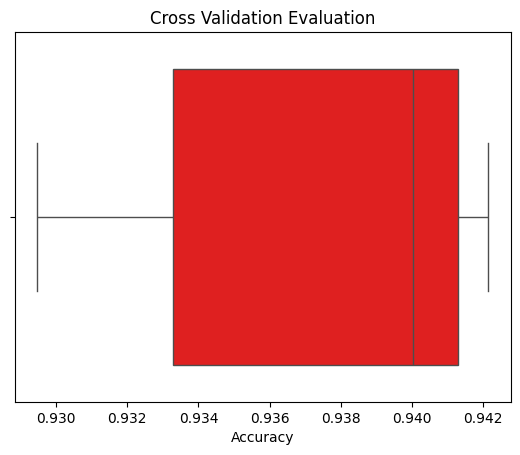

In [17]:
cross_validation_scores = cross_val_score(RandomForestClassifier(), X_train, Y_train)
visual.box_plot(cross_validation_scores, title='Cross Validation Evaluation', x_label='Accuracy')

The box plot shows a consistent range of accuracy scores which are all over 90 %. This indicates the model runs well. Now we can visualise how the models predictions compare to the true values using a confusion matrix, as shown below on the test data.

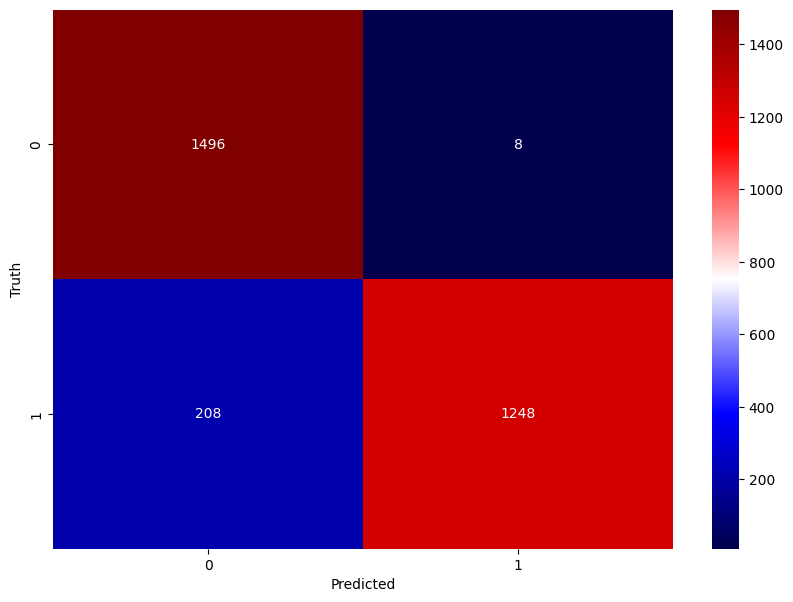

In [18]:
# Scoring Test
Y_predicted = model.predict(X_test)
visual.confusion_matrix(Y_test, Y_predicted, 1)

The visual above demonstrates that the model generally makes correct predictions compared to the true values on data different to the data the model was trained on. 

Now it is worth considering how the model predictions compare to the true values on the training data, this is so that the fitting of the model can be understood.

Model Performance - Training Data:
Accuracy = 93.56%.


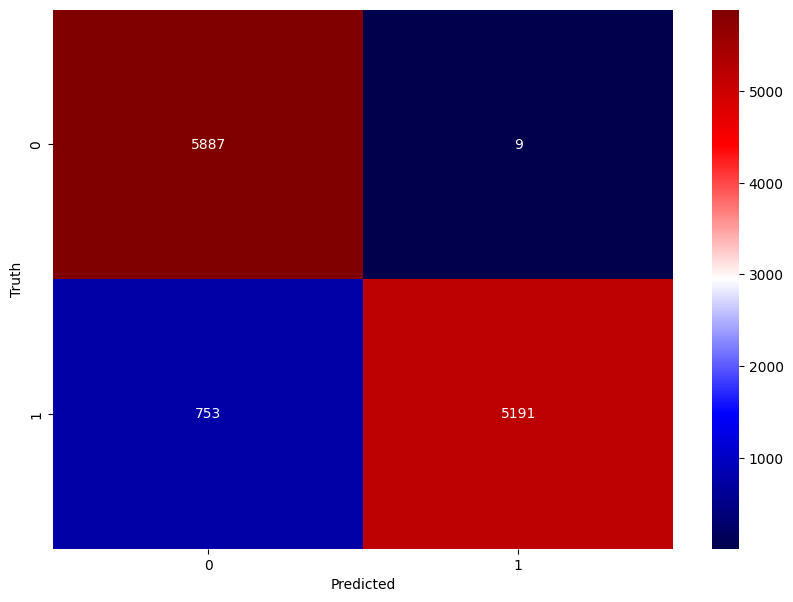

In [19]:
# Scoring Train
Y_predicted = model.predict(X_train)
accuracy = accuracy_score(Y_train, Y_predicted)
print('Model Performance - Training Data:')
print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
visual.confusion_matrix(Y_train, Y_predicted, 2)

The model has a similar accuracy on the training_data (94 %) compared to the testing data (93 %) which indicates the model has not been over fitted. We can now identify which training features contributed more towards the models' predictions and visualise each feature's importance.

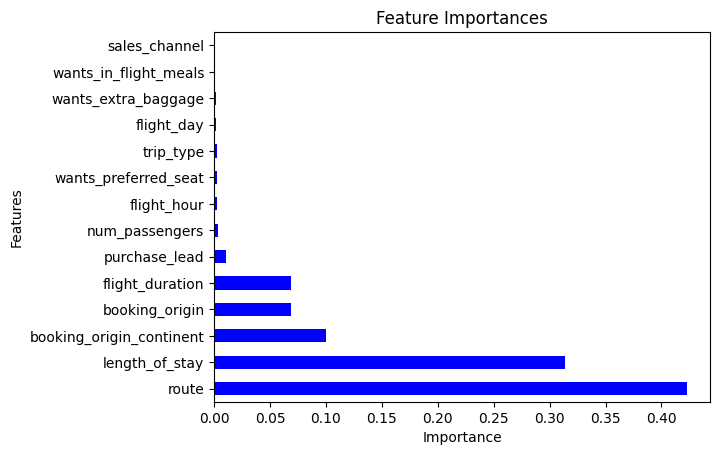

In [20]:
feature_importances = model.feature_importances_
visual.feature_importance(model_df, feature_importances, 'booking_complete')

Some of the key features identified can be seen to be the `route`, `length_of_stay`, `booking_origin_continent` and `booking_origin`. This suggests that the probability of booking completion is dependant on time and location based factors such as how long the trip and route is, as well as where the booking is made. factors such as the `trip_type`, `sales_channel`, `in_flight_meals` and `extra_baggage`have less influence on the models predictions, however this could also be due to the lack of variability and general homogeneity of the data within those features. 

# Conclusion
---

This notebook explored booking data and pre-processed it for fitting by a `Random Forest Classifier` predictive model with the aim of succesfully predicting whether a customer is likely to complete a booking based on other booking features. This model was trained on a balanced subset of the data and was able to predict test data with **92.7 %** accuracy, indicating the model is generally reliable. Cross-validation was also done to further evaluate the model accuracy. The importance of each feature to the model predictions was also evaluated with the `route` being the most important and `sales_channel` being the least important.

### Future Work

To further explore the data and develop the model further, future work could:

- Consider further analysis looking at how exactly the features impacted the predictions, e.g: 
    - Which countries were more likely to result in completed bookings
    - Does a longer or shorter trip length increase the chances of a booking being completed.
- Experiment with different machine learning classification models' predictions and accuracy, which could be compared.
- Develop the model created in this notebook to be applied and evaluated on more data and subsets of the data from the dataframe.
- Further tune the model hyperparamters, as well as, other variables and measures be explored to optimise the accuracy and predictions of this model.
- Consider training and testing the model using the entire dataframe, accounting for imbalanced data.